<img src="logos.jpg" width="700" />

## Predicting House Prices

This tutorial guides you through a regression predictive modeling application: predict the median price of homes in a given Boston suburb in the mid-1970.

# Tools

* Keras (for developing and evaluating deep learning models)
* Matplot (to graph training history)
* Numpy (tensor operations)
* Scikitlearn (for data normalization)

## Step 1: Load the Boston dataset
We first load the [Boston House Price](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/) dataset, a well-studied problem in machine learning that involves the prediction of a house price in thousands of dollars given details of the house and its neighborhood.

It’s a set of 506 data points that are splitted into 404 training samples and 102 test samples. The dataset describes 13 numerical properties (such as crime rate, proportion of nonretail business acres, chemical concentrations and more) of houses in Boston suburbs in the mid-1970s. 
Each "feature" in the input data has a different scale. For instance some values are proportions, which take a values between 0 and 1, others take values between 1 and 12, others between 0 and 100.

Fortunately, the keras.datasets module already includes methods to load and fetch popular reference datasets like Boston house price dataset.<br>
The following code load the numerical properties and the according labels. The variables train_data and train_targets form the training set, the data that the model will learn from. The model will then be tested on the test set (test_data and test_targets variables).

In [1]:
import keras
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data() # returns two tuples of Numpy arrays. The first tuple represents the training x-y pairs while the second tuple represents the testing x-y pairs.

Using TensorFlow backend.


Show shape (dimensions) of the train and test sets.

In [2]:
print(train_data.shape)
print(test_data.shape)


(404, 13)
(102, 13)


We see that there are 404 and 102 samples for the train and test sets respectively with 13 numerical features each one. The 13 features in the input data are as follow:

1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

The targets are the median values of owner-occupied homes, in thousands of dollars:

In [3]:
train_targets


array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

The prices are typically between \$10,000 and \$50,000. If that sounds cheap, remember this was the mid-1970s, and these prices are not inflation-adjusted.


## Step 2: Preprocess dataset



The first sample of the train dataset is listed below.

In [4]:
train_data[0]


array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

As we note all the input attributes vary in their scales because they measure different quantities. It's a good practice normalize the data before modeling it using a neural network model: for each feature in the input data (a column in the input data matrix), you subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation. This is easily done in Numpy.


In [5]:
mean = train_data.mean(axis=0) # Compute the arithmetic mean along the sample's axis (0).
train_data -= mean # For each element inside the train array then substract the mean value.
std = train_data.std(axis=0) # Compute the standard deviation along the sample's axis (0).
train_data /= std # For each element inside the train array then divide the std value.

test_data -= mean # For each element inside the train array then substract the mean value.
test_data /= std # For each element inside the train array then divide by the std value.


Note that the quantities used for normalizing the test data are computed using the training data. You should never use in your workflow any quantity computed on the test data, even for something as simple as data normalization.

## Step 3: Define model's arquitecture and layers


Because so few samples are available, we’ll use a very small network. In general, the less training data you have, the worse overfit-ting will be, and using a small network is one way to mitigate overfitting.
<br><br>


In [6]:
from keras.models import Sequential
from keras.layers import Dense

# Because we will need to instantiate
# the same model multiple times,
# we define a function to construct it and we will use it for in the validation stage
def build_model():
    model = Sequential() # Declare de Sequential model (linear stack of layers), which is the most common way by far.
    
    # Declare the input layer and the first hidden layer.
    model.add(Dense(64, # Integer number that corresponds to the dimensionality of the output space (the number of neurons in the next layer that in this case is the first hidden layer).
                    input_shape=(13,), # The input shape should be the same of the training input (in this case the number of features).
                    activation='relu') # The rectifier (Relu) activation function is used for models where we need continuous values.
             )
    
    #Declare the second hidden layer (with the same values of the previous hidden layer).
    model.add(Dense(64, activation='relu'))
    
    # Declare the output layer with one neuron due to in this case we have a regression problem. 
    model.add(Dense(1))
    
    # Setup the network compilation
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])    
    return model

Note:
* The previous code compiles the network with the mse loss function—mean squared error, the square of the difference between the predictions and the targets. This is a widely used loss function for regression problems.
* The code also setup the network to monitor the mean absolute error (MAE) metric during training. It’s the absolute value of the difference between the predictions and the targets. For instance, an MAE of 0.5 on this problem would mean your predictions are off by $500 on average.

The network ends with a single unit and no activation function (it will be a linear layer) so the network is free to predict values in any range. This is a typical setup for scalar regression (a regression where you’re trying to predict a single continuous value).

The resulting model is a neural network with two hidden layer, each with 64 units and a output layer with 1 output unit. 

![title](nb2-1.jpg)

## Step 4: Validate the model using K-fold validation


To evaluate the model, we could split the data into a training set and a validation set. But because we have so few data points, the validation set would end up being very small (for instance, about 100 examples). As a consequence, the validation scores might change a lot depending on which data points you chose to use for validation and which you chose for training: the validation scores might have a high variance with regard to the validation split. This would prevent from reliably evaluating the model.
<br><br>
The best practice in such situations is to use K-fold cross-validation. It consists of splitting the available data into K partitions (typically K = 4 or 5), instantiating K identical models, and training each one on K – 1 partitions while evaluating on the remaining partition. The validation score for the model used is then the average of the K validation scores obtained.



In [7]:
import numpy as np 

k = 4 # Number of folds.
num_val_samples = len(train_data) // k
num_epochs = 90 # Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.
all_scores = [] # Array to save each fold score.
all_mae_histories = [] # Array to save the metrics to be captured in each epoch (for plotting purposes).
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, # numpy array of training data.
                        partial_train_targets, # numpy array of training target (label) data.
                        validation_data=(val_data, val_targets), # data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data
                        epochs=num_epochs, # number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.
                        batch_size=1, # integer or NULL. Number of samples per gradient update. If unspecified, batch_size will default to 32.
                        verbose=0) # verbosity mode: 0 = silent, 1 = progress bar, 2 = one line per epoch.
    
    # Save the mean absolute error train history
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)



('processing fold #', 0)
('processing fold #', 1)
('processing fold #', 2)
('processing fold #', 3)


The next code show the score of each fold.

In [8]:
all_scores


[2.0716859786817343, 2.428080931748494, 3.6035199920729837, 2.19303965863615]

The next code calculate the mean of all scores.

In [9]:
np.mean(all_scores)


2.5740816402848408

As you can notice, the different runs do indeed show rather different validation scores, from 2.4 to 2.6. Their average (2.5) is a much more reliable metric than any single of these scores -- that's the entire point of K-fold cross-validation. In this case, we are off by \$2,500 on average, which is still significant considering that the prices range from \$10,000 to \$50,000.

We can then compute the average of the per-epoch MAE scores for all folds:


In [10]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]




Let's plot this:


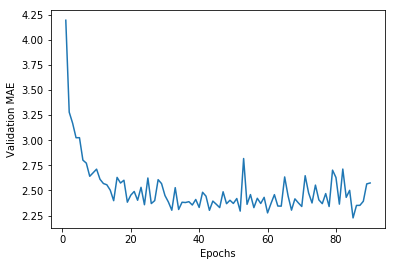

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot( # Plot Y versus X as lines.
    range(1, len(average_mae_history) + 1), # Set the X coordinates (integer numbers from 1 to 80)
    average_mae_history # Set the Y coordinates (each average_mae_history value)
) 
plt.xlabel('Epochs') # set the x-axis label of the current axes.
plt.ylabel('Validation MAE') # set the y-axis label of the current axes.
plt.show()



According to this plot, it seems that validation MAE stops improving significantly after 83 epochs approximately. Past that point, we start overfitting.

Once we are done tuning other parameters of our model (besides the number of epochs, we could also adjust the size of the hidden layers), we can train a final "production" model on all of the training data, with the best parameters, then look at its performance on the test data:

In [12]:
# Get a fresh, compiled model.
model = build_model()

# Train it on the entirety of the data.
model.fit(train_data, # numpy array of training data.
          train_targets, # numpy array of training target (label) data.
          epochs=83, # number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.
          batch_size=16, # integer or NULL. Number of samples per gradient update. If unspecified, batch_size will default to 32.
          verbose=0 # verbosity mode: 0 = silent, 1 = progress bar, 2 = one line per epoch.
         )
test_mse_score, test_mae_score = model.evaluate( # is for evaluating your trained model. Its output is accuracy or loss, not prediction to your input data.
                                                test_data, # numpy array of test data.
                                                test_targets # numpy array of test target (label) data.
                                                )

102/102 [==============================] - 0s 579us/step


In [13]:
test_mae_score

2.6143015412723316

We are still off by about \$2,600.

## Step 5: Create predictions on the test set

Finally to create predictions using the model, we can use the predict() function.


In [14]:
from numpy import array

# Get the input data to be predicted from the test set (13 features)
Xnew = array([test_data[1]])

# Make a prediction
ynew = model.predict(Xnew)

# Show the inputs, the known target, and the predicted target
print("Data (13 features): %s\n Known target: %s\n Predicted target=%s" % (Xnew, test_targets[1], ynew) )

Data (13 features): [[-0.39242675 -0.48361547 -0.16087773 -0.25683275 -0.08840061 -0.49947436
   0.85606329 -0.68396235 -0.39603557  0.15707841 -0.30759583  0.42733126
   0.47880119]]
 Known target: 18.8
 Predicted target=[[18.664377]]


## Conclusions

* Regression is done using different loss functions from classification; Mean Squared Error (MSE) is a commonly used loss function for regression.
* Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally the concept of "accuracy" does not apply for regression. A common regression metric is Mean Absolute Error (MAE).
* When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
* When there is little data available, using K-Fold validation is a great way to reliably evaluate a model.
* When little training data is available, it is preferable to use a small network with very few hidden layers (typically only one or two), in order to avoid severe overfitting.
